# Logistic Regression - tfidf

## Read the data

In [1]:
import pandas as pd

df_train = pd.read_json("../data/aclIMDB_train.json", orient='records')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

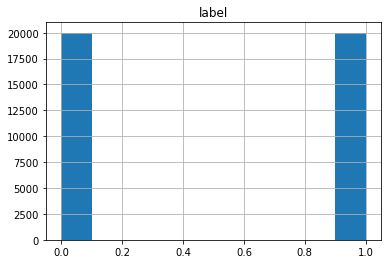

In [2]:
df_train.hist()

In [3]:
df_test = pd.read_json("../data/aclIMDB_test.json", orient='records')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

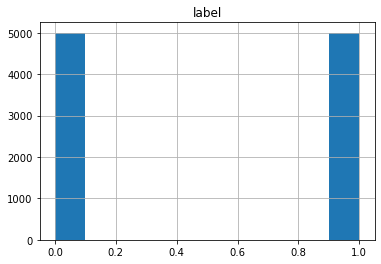

In [4]:
df_test.hist()

In [5]:
df_test["text"] = [str(item).lower() for item in df_test["text"].values]
df_test.head(5)

,text,label
0,don't drink the cool-aid.<br /><br />this is a...,0
1,this movie is told through the eyes of a young...,0
2,mystery men is one of those movies that gets f...,1
3,touching and sad movie. portrays the trials an...,1
4,"""the matador"" stars pierce brosnan as a burned...",1


In [6]:
df_train["text"] = [str(item).lower() for item in df_train["text"].values]
df_train.head(5)

,text,label
0,this film fails on many many levels. the scrip...,0
1,john voight plays the title character in this ...,1
2,i don't know why critics cal it bizarre and ma...,1
3,"well groomed, well behaved teen meg tilly must...",1
4,"my favorite ""imperialism"" movie and one of the...",1


In [7]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(df_train["text"].values)
y_train = np.array(df_train["label"].values)
X_test = vectorizer.transform(df_test["text"].values)
y_test = np.array(df_test["label"].values)

In [8]:
X_train.shape

(40000, 23287)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [10]:
print(y_train[:10])
print(model.predict(X_train[:10]))
model.score(X_train, y_train)

[0 1 1 1 1 1 0 0 0 0]
[0 1 1 1 1 1 0 0 0 0]


0.8791

In [11]:
print(y_test[:10])
print(model.predict(X_test[:10]))
model.score(X_test, y_test)

[0 0 1 1 1 1 1 0 0 1]
[0 1 1 1 1 1 1 0 0 1]


0.8562